# 서울시 자치구별 공원 현황

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시공원요약.csv to 서울시공원요약.csv


In [3]:
park = pd.read_csv(filename)
park.head()

,공원명,지역,경도,위도,면적,분류,크기
0,남산도시자연공원,중구,126.990377,37.550140,2896887,대형,15
1,길동생태공원,강동구,127.154779,37.540394,80683,소형,3
2,서울대공원,과천시,127.019846,37.426449,9132690,대형,15
3,서울숲,성동구,127.041798,37.543072,480994,중형,7
4,월드컵공원,마포구,126.878907,37.571805,2284085,대형,15


- 자치구별 공원수와 공원면적

In [4]:
df = park.groupby('지역')[['면적']].agg(['count', 'sum'])
df.drop(index='과천시', inplace=True)
df.columns = ['공원수', '공원면적']
df.head()

,공원수,공원면적
지역,,
강남구,7,3626398
강동구,7,1526390
강북구,4,3714902
강서구,9,2194154
관악구,2,10431453


In [5]:
df.shape

(25, 2)

- 구별 공원면적 비율과 인당 공원면적

In [6]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 서울시인구밀도.txt to 서울시인구밀도.txt


In [8]:
seoul_df = pd.read_csv(filename, sep = '\t')
seoul_df.drop(index=0, inplace=True)
seoul_df.set_index('지역', inplace=True)
seoul_df.head()

,기간,인구,면적,인구밀도(명/㎢)
지역,,,,
종로구,2020,"158,996",23.91,"6,649"
중구,2020,"134,635",9.96,"13,517"
용산구,2020,"244,645",21.87,"11,188"
성동구,2020,"300,505",16.86,"17,822"
광진구,2020,"360,109",17.06,"21,105"


In [12]:
df = df.join(seoul_df[['인구','면적']])
df.head()

,공원수,공원면적,인구,면적
지역,,,,
강남구,7,3626398,"544,055",39.50
강동구,7,1526390,"463,998",24.59
강북구,4,3714902,"311,569",23.60
강서구,9,2194154,"585,901",41.44
관악구,2,10431453,"509,803",29.57


In [14]:
df['면적'] = df.면적 * 1000000
df['인구'] = df.인구.apply(lambda x : int(x.replace(',','')))
df.head()

,공원수,공원면적,인구,면적
지역,,,,
강남구,7,3626398,544055,39500000.0
강동구,7,1526390,463998,24590000.0
강북구,4,3714902,311569,23600000.0
강서구,9,2194154,585901,41440000.0
관악구,2,10431453,509803,29570000.0


In [15]:
df['구별공원면적'] = df.공원면적 / df.면적 * 100
df['인당공원면적'] = df.공원면적 / df.인구
df.head()

,공원수,공원면적,인구,면적,구별공원면적,인당공원면적
지역,,,,,,
강남구,7,3626398,544055,39500000.0,9.180754,6.665499
강동구,7,1526390,463998,24590000.0,6.207361,3.289648
강북구,4,3714902,311569,23600000.0,15.741110,11.923208
강서구,9,2194154,585901,41440000.0,5.294773,3.744923
관악구,2,10431453,509803,29570000.0,35.277149,20.461733


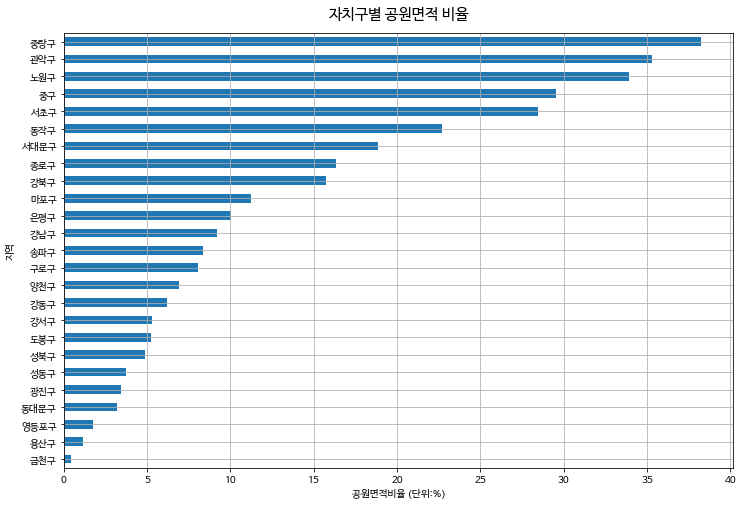

In [23]:
df.구별공원면적.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 공원면적 비율', size=15, y=1.02)
plt.xlabel('공원면적비율 (단위:%)')
plt.show()

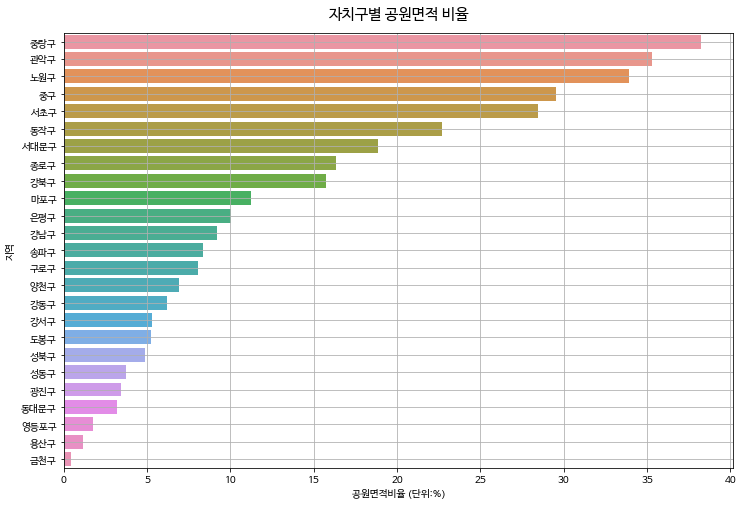

In [24]:
plt.figure(figsize=(12,8))
order = df.구별공원면적.sort_values(ascending=False).index
sns.barplot(x='구별공원면적', y=df.index, data=df, order=order)
plt.title('자치구별 공원면적 비율', size=15, y=1.02)
plt.xlabel('공원면적비율 (단위:%)')
plt.grid()
plt.show()

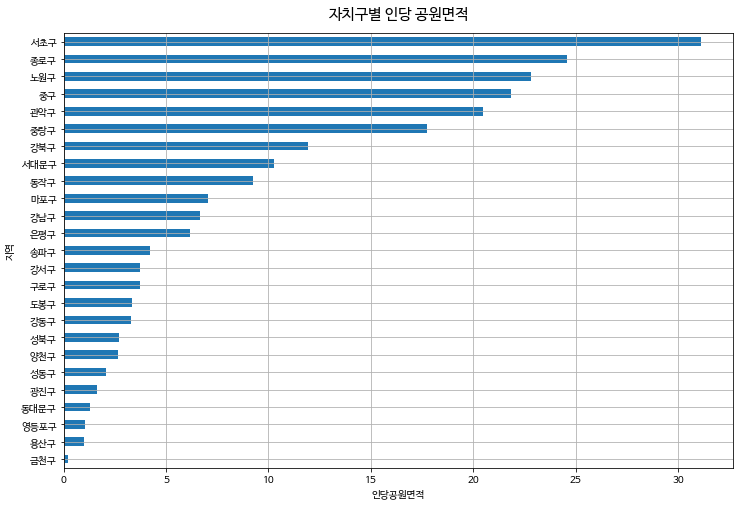

In [26]:
df.인당공원면적.sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('자치구별 인당 공원면적', size=15, y=1.02)
plt.xlabel('인당공원면적')
plt.show()

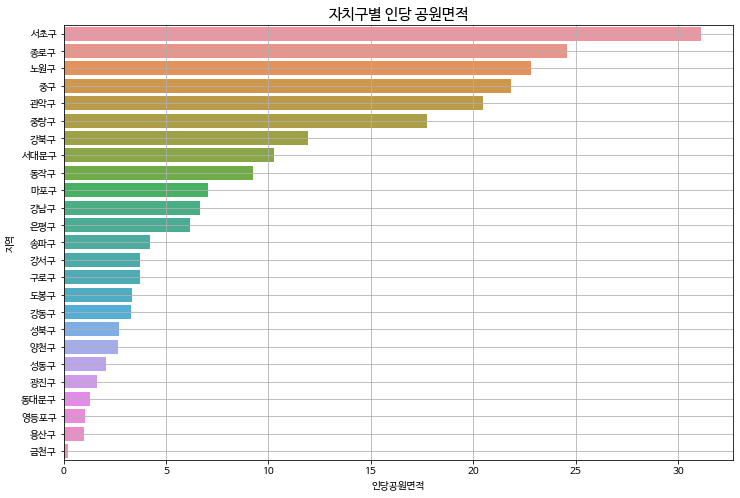

In [27]:
plt.figure(figsize=(12,8))
order = df.인당공원면적.sort_values(ascending=False).index
sns.barplot(x='인당공원면적', y=df.index, data=df, order=order)
plt.title('자치구별 인당 공원면적', size=15)
plt.xlabel('인당공원면적')
plt.grid()
plt.show()

In [21]:
df.to_csv('자치구별_공원현황.csv')